# **6.1 파이프라인을 사용한 효율적인 워크플로**

## **6.1.1 위스콘신 유방암 데이터셋**
[https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

악성과 양성인 종양 세포 샘플 569개가 포함된 데이터셋이다.<br>
<br>

**데이터셋의 내용**
- 1열: 샘플의 고유 ID
- 2열: 진단 결과(M=악성, B=양성)
- 3 ~ 32열: 세포 핵의 디지털 이미지에서 계산된 30개의 실수 값 특성

<br>

3 ~ 32열에 있는 특성을 사용하여 종양의 종류(악성, 양성)를 예측하는 모델을 만들 것이다.

<br>

---

<br>

1. ```pandas```를 사용하여 UCI 서버에서 직접 데이터셋을 읽어 온다.

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                  'machine-learning-databases'
                  '/breast-cancer-wisconsin/wdbc.data')

2. 30개의 특성을 넘파이 배열 X에 할당한다.<br>
LabelEncoder 객체를 사용하여 클래스 레이블을 원본 문자열 표현('M'과 'B')에서 정수로 변환한다.<br><br>*```LabelEncoder```는 레이블을 알파벳 순서대로 정렬하기 때문에 'B'가 0, 'M'이 1로 매핑된다.*

In [16]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

클래스 레이블을 배열 y에 인코딩하면 악성(malignant) 종양은 클래스 1로 표현되고, 양성(benign) 종양은 클래스 0으로 표현된다.

In [17]:
le.transform(['M', 'B'])

array([1, 0])

3. 데이터셋을 훈련 데이터셋(전체 데이터의 80%)과 별도의 테스트 데이터셋(전체 데이터의 20%)으로 나눈다.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

## **6.1.2 파이프라인으로 변환기와 추정기 연결**

데이터셋의 특성을 표준화하고, 주성분 분석(PCA)을 이용하여 30차원에서 2차원 부분 공간으로 데이터를 압축한다.

<br>

이때, ```make_pipeline```함수를 사용하여 ```StandardScaler```, ```PCA```, ```LogisticRegression``` 객체를 **하나의 파이프라인으로 연결**해보자.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))

테스트 정확도: 0.930


**```make_pipeline```** 함수는 **여러 개의 사이킷런 변환기와 추정기**(fit 메소드와 predict 메소드를 구현한)를 **연결**할 수 있다.<br>
중간 단계(**변환기)의 횟수는 제한이 없다**.<br>
하지만 **마지막 요소는 반드시 추정기**가 되어야 한다.

<br>

*변환기: 입력에 대해 fit 메소드와 transform 메소드를 지원하는 객체)*

<br>



사이킷런의 **```Pipeline``` 클래스**는 **메타 추정기(meta-estimator)**나 개별 변환기와 추정기를 감싼 **래퍼(wrapper)**로 생각할 수 있다. 

<br>

```Pipeline``` 객체의 **```fit``` 메소드를 호출**하면 데이터가 중간 단계에 있는 **모든 변환기의 ```fit``` 메소드와 ```transform``` 메소드를 차례로 거쳐 추정기에 도달**한다.<br>
추정기는 변환된 훈련 데이터셋을 사용하여 학습한다.

<br>

```Pipeline``` 객체의 **```predict``` 메소드를 호출**하면 predict 메소드를 호출할 때 주입된 데이터가 중간 단계의 ```transform``` 메소드를 통과하여,<br> 추정기 객체가 변환된 데이터에 대한 **예측을 반환**한다.

<br>

<사이킷런의 파이프라인 작동 방식>

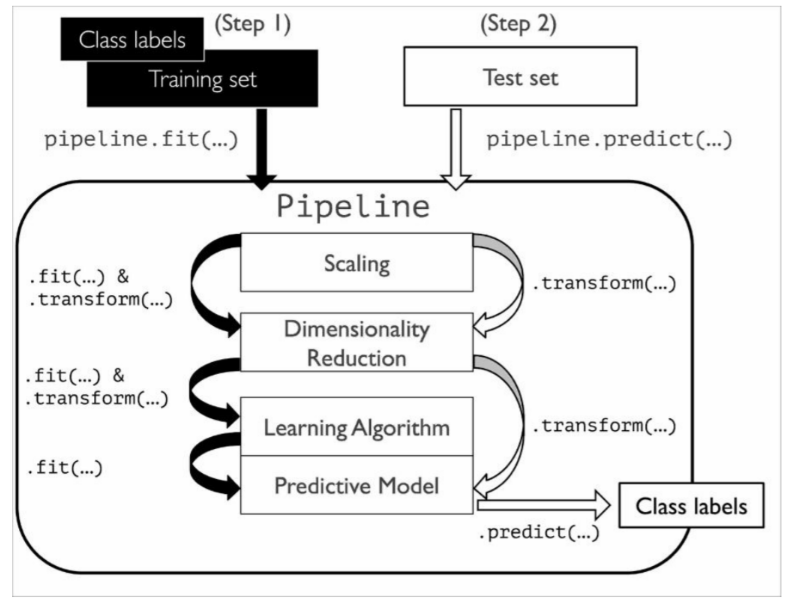


<br>

---

<br>
